<a href="https://colab.research.google.com/github/Suraez/laughing-octo-sniffle/blob/main/expt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is for converting the downloaded raw .txt data to .csv data, Ignore this if you have already got the CSV

In [ ]:
import pandas as pd

# Specify the input TXT file path and output CSV file path
txt_file_path = "/content/data_2021_azure.txt"
csv_file_path = "/content/data.csv"

# Load the TXT file into a pandas DataFrame
# Assuming the TXT file is comma-separated
df = pd.read_csv(txt_file_path, sep=",")

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"File converted and saved as {csv_file_path}")


File converted and saved as /content/data.csv


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


### Initialization

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/MyDrive/research/data.csv')

# Sort by app, func, and end_timestamp to ensure order
df = df.sort_values(by=['app', 'func', 'end_timestamp'])

# Calculate time interval in seconds between invocations for each function
df['time_interval'] = df.groupby(['app', 'func'])['end_timestamp'].diff()
df = df.dropna(subset=['time_interval'])  # Remove NaNs resulting from the first invocation


In [ ]:
intervals = df['time_interval'].values


In [ ]:
sequence_length = 10  # Adjust as needed
X = np.lib.stride_tricks.sliding_window_view(intervals, sequence_length)
y = intervals[sequence_length:]

In [ ]:
# Reshape X for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshaping to (samples, sequence_length, features)
# Ensure X and y have consistent lengths
X = X[:-1]


### Normalization of X and Y

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y = scaler.fit_transform(y.reshape(-1, 1))


In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Regularization to prevent overfitting
    Dense(50, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)


Epoch 1/2
39611/39611 ━━━━━━━━━━━━━━━━━━━━ 258s 7ms/step - loss: 3.0607e-05 - val_loss: 2.2008e-05
Epoch 2/2
39611/39611 ━━━━━━━━━━━━━━━━━━━━ 256s 6ms/step - loss: 3.0266e-05 - val_loss: 2.1416e-05


In [ ]:
# Example usage
app_id = '85479ef37b5dc75dd5aeca3bab499129b97a134dac5d740d2c68941de9d63031'  # Replace with the actual app ID
func_id = 'e02465de583b6ceffa5b78cce5f10eb27e714a8a6b3aed483be50f30a924071f'  # Replace with the actual function ID
next_invocation, predicted_interval = predict_next_invocation(model, X, df, app_id, func_id)
print(f"Predicted next invocation timestamp: {next_invocation}")
print(f"Predicted time interval: {predicted_interval}")

NameError: name 'predict_next_invocation' is not defined

In [ ]:
!git clone https://github.com/Suraez/laughing-octo-sniffle.git
%cd laughing-octo-sniffle
!git status


Cloning into 'laughing-octo-sniffle'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 4.92 KiB | 4.92 MiB/s, done.
/content/laughing-octo-sniffle
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


### Code for counting the unique value in a column

In [ ]:
# Replace 'file_path' with the path to your CSV file
file_path = '/content/sampled_dataset.csv'
# Replace 'column_name' with the name of the column you want to analyze
column_name = 'HashFunction'

def count_unique_values(file_path, column_name):
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Count the number of unique values in the specified column
        unique_count = df[column_name].nunique()
        return unique_count
    except Exception as e:
        print(f"Error: {e}")
        return None

unique_count = count_unique_values(file_path, column_name)

if unique_count is not None:
    print(f"Number of unique values in column '{column_name}': {unique_count}")


Number of unique values in column 'HashFunction': 20


### Sampling the Azure Function Invocation Traceset 2019

In [ ]:
# Assume 'file_path' is the path to your dataset
file_path = '/content/drive/MyDrive/research/data2019.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Step 1: Select the first 480 minute columns (representing the 8-hour period)
# The minute columns are assumed to start at index 3 (after 'HashOwner', 'HashApp', 'HashFunction')
start_minute = 4  # Starting index for minute columns
end_minute = start_minute + 10  # Select 10 minutes for 10 minutes
selected_columns = ['HashOwner','HashApp', 'HashFunction', 'Trigger'] + df.columns[start_minute:end_minute].tolist()

df_subset = df[selected_columns]

# Step 2: Randomly sample 20 unique functions
# Get unique functions from the 'HashFunction' column
unique_functions = df_subset['HashFunction'].unique()

# Randomly select 20 functions
sampled_functions = pd.Series(unique_functions).sample(n=20, random_state=42).tolist()

# Step 3: Filter the dataset for the sampled functions
filtered_df = df_subset[df_subset['HashFunction'].isin(sampled_functions)]

# Save the sampled dataset to a new file (optional)
filtered_df.to_csv('sampled_dataset.csv', index=False)

print("Dataset sampled for 10 minutes and 20 functions. Saved to 'sampled_dataset.csv'.")


Dataset sampled for 8 hours and 20 functions. Saved to 'sampled_dataset.csv'.


Randomization of the sampled dataset

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/sampled_dataset_1_0_10minutes.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Randomly populate 1 in columns named 1 to 10
columns_to_modify = [str(i) for i in range(1, 11)]

for column in columns_to_modify:
    # Replace all values in the column with random 0 or 1
    df[column] = np.random.choice([0, 1], size=len(df))

# Save the modified dataset
output_path = "sample_modified.csv"  # Replace with the desired save location
df.to_csv(output_path, index=False)

print(f"Modified dataset saved to {output_path}")


### printing out rows having values greater than 1

In [ ]:

# Step 1: Select the relevant columns (index 4 to 483)
numeric_columns = filtered_df.columns[3:483]  # Column indices are 0-based

# Step 2: Filter rows where any value in the specified columns is greater than 1
rows_with_values_gt_1 = filtered_df[(filtered_df[numeric_columns] > 1).any(axis=1)]

# Step 3: Print the filtered rows
print(rows_with_values_gt_1)

# Save to a CSV file (optional)
rows_with_values_gt_1.to_csv('rows_with_values_gt_1.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/sampled_dataset_0_1_10minutes.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Select columns 5 to 15 (Python indexing is zero-based, so these are columns 4 to 14)
columns_of_interest = data.iloc[:, 4:6]

# Count the total number of 1s in these columns
total_ones = (columns_of_interest == 1).sum().sum()

print(f"Total number of 1s in columns 5 to 15: {total_ones}")


Total number of 1s in columns 5 to 15: 29


Warm Start: 73, Cold Start: 70


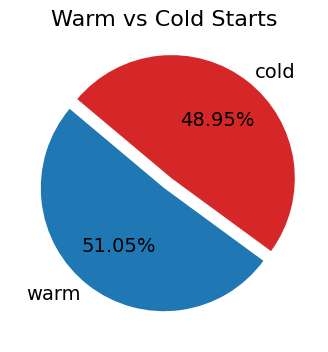

In [4]:
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd

# Paste your data here as a multiline string
data = """
Datetime,Activation ID,Kind,Start,Duration,Status,Entity
2025-01-08 20:30:40,73d24d19ecf4418a924d19ecf4318a2b,python:3,cold,76ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:30:40,bc12b7ad5d55419b92b7ad5d55719ba8,java:8,cold,326ms,success,guest/dq:0.0.1
2025-01-08 20:30:39,6ff28cb10f5e4ecdb28cb10f5ebecd14,python:3,warm,2ms,success,guest/gb:0.0.1
2025-01-08 20:30:39,460927d3eaa945418927d3eaa9a5412a,python:3,cold,201ms,success,guest/gb:0.0.1
2025-01-08 20:30:38,34947f3b9c2e47e8947f3b9c2e17e882,python:3,warm,7ms,success,guest/sa:0.0.1
2025-01-08 20:30:38,c428f07eafb04649a8f07eafb086498d,python:3,cold,500ms,success,guest/sa:0.0.1
2025-01-08 20:30:37,18172660098341ad972660098371ad1e,java:8,warm,3ms,success,guest/ds:0.0.1
2025-01-08 20:30:36,4fbef99bd2f54c3ebef99bd2f5ac3ebc,java:8,warm,3ms,success,guest/ds:0.0.1
2025-01-08 20:30:36,3d7b4891adad47d6bb4891adadf7d649,java:8,warm,2ms,success,guest/ds:0.0.1
2025-01-08 20:30:35,6ca4a7ab9ea44878a4a7ab9ea4c87861,java:8,cold,319ms,success,guest/ds:0.0.1
2025-01-08 20:30:35,2e15402884994ed59540288499aed59f,java:8,warm,26ms,success,guest/dl:0.0.1
2025-01-08 20:30:34,1a22678dcdb745aba2678dcdb7f5abc4,java:8,warm,28ms,success,guest/dl:0.0.1
2025-01-08 20:30:34,31c974d534104a098974d53410da09ae,java:8,warm,27ms,success,guest/dl:0.0.1
2025-01-08 20:30:33,0c87f56354364c1487f56354369c14f2,java:8,cold,370ms,success,guest/dl:0.0.1
2025-01-08 20:30:32,a72bb725c3ee4b0cabb725c3eebb0c4d,python:3,warm,14ms,success,guest/md:0.0.1
2025-01-08 20:30:32,bb80e258f4394d0380e258f439bd036a,python:3,warm,17ms,success,guest/md:0.0.1
2025-01-08 20:30:31,1cd1e378776341de91e3787763d1dec3,python:3,warm,24ms,success,guest/md:0.0.1
2025-01-08 20:30:31,40d6ad0597e6494696ad0597e6d94600,python:3,cold,190ms,success,guest/md:0.0.1
2025-01-08 20:30:30,024bef9d5ccd4a278bef9d5ccdca270d,python:3,warm,264ms,success,guest/fc:0.0.1
2025-01-08 20:30:30,cddc807960bc41889c807960bc418850,python:3,warm,267ms,success,guest/fc:0.0.1
2025-01-08 20:30:29,2b1c32a194ba4eb49c32a194baeeb455,python:3,warm,263ms,success,guest/fc:0.0.1
2025-01-08 20:30:29,0dab7aff307b4baaab7aff307b3baad4,python:3,cold,484ms,success,guest/fc:0.0.1
2025-01-08 20:30:28,590da31e41af41158da31e41afa11562,nodejs:12,warm,3ms,application,error
2025-01-08 20:30:28,56edd7b674744ebcadd7b674741ebc59,nodejs:12,warm,3ms,application,error
2025-01-08 20:30:27,1b0754e9e99d44128754e9e99db4128b,nodejs:12,cold,271ms,application,error
2025-01-08 20:30:27,94f0065c08204cd2b0065c0820acd246,nodejs:12,warm,235ms,success,guest/is:0.0.1
2025-01-08 20:30:26,1c3f7f3675b049d4bf7f3675b019d4bc,nodejs:12,cold,477ms,success,guest/is:0.0.1
2025-01-08 20:30:26,2b1cd10da34e47b59cd10da34e97b560,java:8,warm,2ms,success,guest/dg:0.0.1
2025-01-08 20:30:26,3ec3f0a2953241d983f0a29532e1d999,java:8,cold,318ms,success,guest/dg:0.0.1
2025-01-08 20:30:25,3649f735ae2b402389f735ae2b602362,java:8,cold,378ms,success,guest/dt:0.0.1
2025-01-08 20:30:24,9c56705a71d3457496705a71d3e574a8,python:3,cold,286ms,success,guest/gp:0.0.1
2025-01-08 20:30:24,ab14d6d8469c419094d6d8469cc190d6,python:3,cold,219ms,success,guest/gb:0.0.1
2025-01-08 20:30:23,8784e9ebf2744aba84e9ebf2742aba21,nodejs:12,warm,251ms,success,guest/tn:0.0.1
2025-01-08 20:30:23,da9e08bed52746db9e08bed527a6db42,nodejs:12,warm,229ms,success,guest/tn:0.0.1
2025-01-08 20:30:22,d5b5d0f0ac374ff0b5d0f0ac37eff031,nodejs:12,cold,896ms,success,guest/tn:0.0.1
2025-01-08 20:30:21,6cb2fefac2b044c9b2fefac2b054c904,nodejs:12,warm,2ms,success,guest/oi:0.0.1
2025-01-08 20:30:21,23e2cf78d8624b4da2cf78d8623b4dca,nodejs:12,warm,2ms,success,guest/oi:0.0.1
2025-01-08 20:30:20,3db8c0e7538d4301b8c0e7538d8301e0,nodejs:12,cold,167ms,success,guest/oi:0.0.1
2025-01-08 20:30:20,4d662db0089246f5a62db00892e6f538,nodejs:12,warm,2ms,success,guest/ac:0.0.1
2025-01-08 20:30:19,c41533fbbfda481c9533fbbfda281ca0,nodejs:12,cold,148ms,success,guest/ac:0.0.1
2025-01-08 20:30:19,c9e75f977cc64bcaa75f977cc66bca03,python:3,cold,68ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:30:18,cf0964fb0888430a8964fb0888530aa6,java:8,warm,3ms,success,guest/dq:0.0.1
2025-01-08 20:30:18,2b62f74bff10454fa2f74bff10354f5a,java:8,cold,326ms,success,guest/dq:0.0.1
2025-01-08 20:30:17,4069133ebb074088a9133ebb07108803,python:3,warm,5ms,success,guest/sa:0.0.1
2025-01-08 20:30:17,f7acc021f5ae46caacc021f5aed6ca9e,python:3,cold,522ms,success,guest/sa:0.0.1
2025-01-08 20:30:16,81adae9bf6964ba2adae9bf696eba2bf,nodejs:12,warm,2ms,success,guest/is:0.0.1
2025-01-08 20:30:15,36146769930944bc9467699309e4bce6,nodejs:12,warm,43ms,success,guest/is:0.0.1
2025-01-08 20:30:15,5932032958d4412cb2032958d4912c01,nodejs:12,warm,48ms,success,guest/is:0.0.1
2025-01-08 20:30:15,14019cfc82de4397819cfc82deb397cb,nodejs:12,cold,472ms,success,guest/is:0.0.1
2025-01-08 20:30:14,c5380dfb82444da2b80dfb82444da2f6,java:8,warm,2ms,success,guest/dg:0.0.1
2025-01-08 20:30:14,e657e033b3d1491a97e033b3d1b91a87,java:8,warm,2ms,success,guest/dg:0.0.1
2025-01-08 20:30:14,f48c4ad6635c45808c4ad6635cd58039,java:8,warm,3ms,success,guest/dg:0.0.1
2025-01-08 20:30:14,a7c6e8bd83fb4e4d86e8bd83fb7e4d2a,java:8,cold,307ms,success,guest/dg:0.0.1
2025-01-08 20:30:14,bd39673d5d704e3eb9673d5d708e3e66,python:3,warm,21ms,success,guest/gp:0.0.1
2025-01-08 20:30:14,f763d3ec284f4f07a3d3ec284f1f078c,python:3,warm,7ms,success,guest/gp:0.0.1
2025-01-08 20:30:13,ee626a750aa64781a26a750aa6a781b8,python:3,warm,178ms,success,guest/gp:0.0.1
2025-01-08 20:30:13,a3644f4b8cc94d69a44f4b8cc95d6908,python:3,cold,259ms,success,guest/gp:0.0.1
2025-01-08 20:30:13,3c2e8d4e18eb483bae8d4e18eb783be4,python:3,warm,8ms,success,guest/dv:0.0.1
2025-01-08 20:30:13,0e5de6c13ee346cf9de6c13ee336cf97,python:3,warm,11ms,success,guest/dv:0.0.1
2025-01-08 20:30:13,6a5192af78ec4c239192af78ec9c23cb,python:3,warm,9ms,success,guest/dv:0.0.1
2025-01-08 20:30:13,2bdf659d6eaa4f4c9f659d6eaacf4cf1,python:3,cold,257ms,success,guest/dv:0.0.1
2025-01-08 20:30:12,3ad651ac24994e1f9651ac24994e1fe3,python:3,cold,490ms,success,guest/fc:0.0.1
2025-01-08 20:30:11,5b5a787f5eb147359a787f5eb1d735e1,nodejs:12,warm,5ms,success,guest/dh:0.0.1
2025-01-08 20:30:11,234c18bea0e3445b8c18bea0e3745b45,nodejs:12,warm,4ms,success,guest/dh:0.0.1
2025-01-08 20:30:11,a8235bf9461d48b4a35bf9461da8b4c8,nodejs:12,cold,148ms,success,guest/dh:0.0.1
2025-01-08 20:30:11,caae7d3c7ad24e81ae7d3c7ad26e813f,nodejs:12,cold,445ms,success,guest/is:0.0.1
2025-01-08 20:30:10,ee901527d59a423a901527d59ad23a5e,nodejs:12,cold,152ms,success,guest/dh:0.0.1
2025-01-08 20:30:09,770adbe06af240068adbe06af2a006f7,nodejs:12,cold,469ms,success,guest/is:0.0.1
2025-01-08 20:30:09,d967cbc5b13045b7a7cbc5b13035b756,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:30:09,bd0640245a40463b8640245a40563b18,python:3,warm,1ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:30:09,11ee99d388b94e95ae99d388b9be955a,python:3,cold,76ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:30:08,d06ac5c6ca554cb1aac5c6ca553cb113,java:8,cold,368ms,success,guest/dl:0.0.1
2025-01-08 20:30:08,6db7f77e517f41d9b7f77e517f71d929,python:3,cold,86ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:30:07,b1be2b8157f34f3fbe2b8157f37f3f6c,java:8,cold,381ms,success,guest/dt:0.0.1
2025-01-08 20:30:07,b615b1e98f1d45e895b1e98f1d35e8aa,python:3,warm,53ms,success,guest/ir:0.0.1
2025-01-08 20:30:07,34a064ceebb04d68a064ceebb09d68c2,python:3,warm,52ms,success,guest/ir:0.0.1
2025-01-08 20:30:01,ada1a99b2ff142d5a1a99b2ff112d50b,python:3,cold,5.271s,success,guest/ir:0.0.1
2025-01-08 20:30:01,3c2d0eb9f1c64e9ead0eb9f1c60e9e93,nodejs:12,cold,662ms,success,guest/tn:0.0.1
2025-01-08 20:30:00,794802f331c740fd8802f331c740fd81,nodejs:12,warm,2ms,success,guest/ac:0.0.1
2025-01-08 20:30:00,01d41f3e44b3419b941f3e44b3319b3d,nodejs:12,warm,4ms,success,guest/ac:0.0.1
2025-01-08 20:30:00,afb43b0942ff470fb43b0942ff970fb8,nodejs:12,cold,144ms,success,guest/ac:0.0.1
2025-01-08 20:30:00,82dbef658b8149b29bef658b81c9b217,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:30:00,7d2eb95210eb4c95aeb95210eb9c9588,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:30:00,5142a41b56f64b3f82a41b56f6ab3fb2,python:3,cold,73ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:29:59,fd5f9dcad2f443799f9dcad2f4d379b9,java:8,warm,3ms,success,guest/ds:0.0.1
2025-01-08 20:29:59,f19c3d3a072246f79c3d3a072246f7d9,java:8,warm,3ms,success,guest/ds:0.0.1
2025-01-08 20:29:59,ab26ff3053664de5a6ff3053668de579,java:8,cold,314ms,success,guest/ds:0.0.1
2025-01-08 20:29:58,8236c8ffe1a64c0bb6c8ffe1a62c0bd8,python:3,cold,334ms,success,guest/gp:0.0.1
2025-01-08 20:29:58,303834db90c94310b834db90c9031001,python:3,cold,168ms,success,guest/gb:0.0.1
2025-01-08 20:29:57,7d7c1ba9ab964adfbc1ba9ab968adf46,python:3,cold,284ms,success,guest/dv:0.0.1
2025-01-08 20:29:57,1905b07370384ab785b07370380ab77b,python:3,cold,216ms,success,guest/gb:0.0.1
2025-01-08 20:29:56,17675d00296e4bb4a75d00296ecbb4b8,python:3,cold,504ms,success,guest/sa:0.0.1
2025-01-08 20:29:55,b0de9fff019e466b9e9fff019e366b33,python:3,cold,489ms,success,guest/fc:0.0.1
2025-01-08 20:29:55,7e4a17b63e7c45368a17b63e7c653695,nodejs:12,cold,157ms,success,guest/oi:0.0.1
2025-01-08 20:29:55,f7b779b9e08a4071b779b9e08ab07168,nodejs:12,cold,150ms,success,guest/dh:0.0.1
2025-01-08 20:29:54,75e0d5f35e0e4007a0d5f35e0e2007f8,nodejs:12,cold,488ms,success,guest/is:0.0.1
2025-01-08 20:29:54,f5b504e6218a4589b504e6218a6589e5,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:29:53,76aec7492e2c4a97aec7492e2c4a9738,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:29:53,444791736fcc42ba8791736fcc22baf6,python:3,cold,78ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:29:53,8979c9ccb61649c7b9c9ccb61609c785,java:8,warm,2ms,success,guest/ds:0.0.1
2025-01-08 20:29:53,73bd388b89d444e8bd388b89d424e8af,java:8,warm,3ms,success,guest/ds:0.0.1
2025-01-08 20:29:53,28146867514d4420946867514d24205d,java:8,cold,363ms,success,guest/ds:0.0.1
2025-01-08 20:29:52,881c31367cbb49609c31367cbba9603d,java:8,cold,418ms,success,guest/dt:0.0.1
2025-01-08 20:29:51,25b2d62950c141fdb2d62950c181fd3f,python:3,cold,249ms,success,guest/gm:0.0.1
2025-01-08 20:29:51,906a60ef7b8e4fdaaa60ef7b8e6fda1d,python:3,warm,9ms,success,guest/dv:0.0.1
2025-01-08 20:29:51,741b3554c9f944b89b3554c9f9f4b820,python:3,cold,338ms,success,guest/dv:0.0.1
2025-01-08 20:29:50,7de190adcc724549a190adcc729549d5,python:3,cold,477ms,success,guest/fc:0.0.1
2025-01-08 20:29:50,0624eaae229c47d8a4eaae229c87d882,nodejs:12,warm,3ms,application,error
2025-01-08 20:29:50,8623e762dfb1477da3e762dfb1c77dc0,nodejs:12,cold,260ms,application,error
2025-01-08 20:29:49,be6f25eb41dc4362af25eb41dc43626c,nodejs:12,warm,177ms,success,guest/is:0.0.1
2025-01-08 20:29:49,ac1fa2e9970046779fa2e9970076777d,nodejs:12,warm,60ms,success,guest/is:0.0.1
2025-01-08 20:29:49,6d76fe41ca3d4ee7b6fe41ca3d2ee7cc,nodejs:12,cold,466ms,success,guest/is:0.0.1
2025-01-08 20:29:48,db7390d72f084275b390d72f08027582,java:8,warm,2ms,success,guest/dg:0.0.1
2025-01-08 20:29:48,3796fa65224a401896fa65224ae0185e,java:8,cold,326ms,success,guest/dg:0.0.1
2025-01-08 20:29:47,22d4a54fe06c406594a54fe06c006595,java:8,cold,390ms,success,guest/dl:0.0.1
2025-01-08 20:29:47,5ff0074f58ed4f82b0074f58ed3f8209,python:3,cold,251ms,success,guest/gp:0.0.1
2025-01-08 20:29:46,66b1fc330c9645fdb1fc330c9635fd83,python:3,cold,628ms,success,guest/sa:0.0.1
2025-01-08 20:29:45,6e7e7e3cda6642fdbe7e3cda6622fde0,python:3,warm,62ms,success,guest/ir:0.0.1
2025-01-08 20:29:37,f5753d0fbed54427b53d0fbed56427a2,python:3,cold,8.338s,success,guest/ir:0.0.1
2025-01-08 20:29:36,635ec75406db436e9ec75406dbc36e0a,nodejs:12,cold,149ms,success,guest/dh:0.0.1
2025-01-08 20:29:36,fe74e96a280a4272b4e96a280a327278,nodejs:12,warm,2ms,success,guest/ac:0.0.1
2025-01-08 20:29:35,748be4e4d1f747598be4e4d1f7b75973,nodejs:12,warm,2ms,success,guest/ac:0.0.1
2025-01-08 20:29:35,94706188cae54420b06188cae564206f,nodejs:12,cold,148ms,success,guest/ac:0.0.1
2025-01-08 20:29:34,07e2a03aabed4c7aa2a03aabed2c7a08,python:3,cold,85ms,success,guest/EndExperiment:0.0.1
2025-01-08 20:29:33,ce281ce0ffae4c43a81ce0ffaefc4360,java:8,warm,3ms,success,guest/dq:0.0.1
2025-01-08 20:29:33,b4b08ff0aabf481db08ff0aabf081dab,java:8,warm,3ms,success,guest/dq:0.0.1
2025-01-08 20:29:33,fbce2550650b49378e2550650b8937b1,java:8,warm,3ms,success,guest/dq:0.0.1
2025-01-08 20:29:32,80cfee0c3b5840348fee0c3b58903470,java:8,cold,359ms,success,guest/dq:0.0.1
2025-01-08 20:29:32,ca42845dcad0447c82845dcad0447c84,python:3,cold,164ms,success,guest/gb:0.0.1
2025-01-08 20:29:31,1cdd2ff185ab45bc9d2ff185abd5bcf9,python:3,warm,15ms,success,guest/md:0.0.1
2025-01-08 20:29:31,5c6c8eea77fb409aac8eea77fb609ab3,python:3,cold,200ms,success,guest/md:0.0.1
2025-01-08 20:29:30,5875d3ef8e114a19b5d3ef8e115a191e,nodejs:12,warm,300ms,success,guest/tn:0.0.1
2025-01-08 20:29:30,8a79a7ad4f5b47ecb9a7ad4f5b27ec59,nodejs:12,warm,257ms,success,guest/tn:0.0.1
2025-01-08 20:29:29,f4c278d6e57146238278d6e5715623f2,nodejs:12,warm,265ms,success,guest/tn:0.0.1
2025-01-08 20:29:28,2d42b27dd0314fc982b27dd0313fc9fd,nodejs:12,cold,983ms,success,guest/tn:0.0.1
2025-01-08 20:29:28,02124ed1707a4a99924ed1707aba9929,nodejs:12,warm,11ms,success,guest/dh:0.0.1
2025-01-08 20:29:27,d812d0d557be41dd92d0d557beb1dd5f,nodejs:12,cold,144ms,success,guest/dh:0.0.1
2025-01-08 20:29:26,8be099edc69d4f4da099edc69d0f4d69,nodejs:12,warm,4ms,success,guest/is:0.0.1
2025-01-08 20:29:26,9f6eee692c654cbdaeee692c654cbd4c,nodejs:12,warm,5ms,success,guest/is:0.0.1
2025-01-08 20:29:25,32fa269c8a2a46f1ba269c8a2a76f139,nodejs:12,warm,32ms,success,guest/is:0.0.1
2025-01-08 20:29:25,c9a00247926d4e08a00247926dbe0856,nodejs:12,warm,223ms,success,guest/is:0.0.1
2025-01-08 20:29:25,e0bb6da4111f4158bb6da4111f41583c,nodejs:12,cold,454ms,success,guest/is:0.0.1
2025-01-08 20:29:24,796731fefff24cdba731fefff2dcdb4c,nodejs:12,cold,132ms,success,guest/ac:0.0.1
"""

# Read the data into a DataFrame
df = pd.read_csv(StringIO(data))

# Count occurrences of 'warm' and 'cold' in the "Start" column
start_counts = df['Start'].value_counts()

# Extract the data for the pie chart
labels = start_counts.index.tolist()  # ['cold', 'warm']
sizes = start_counts.values.tolist()  # [count_cold, count_warm]
colors = ['#1f77b4', '#d62728']  # Custom colors for cold and warm
explode = [0.1 if label == 'cold' else 0 for label in labels]  # Explode 'cold' slice

# Create the pie chart
plt.figure(figsize=(4, 4))  # Set the figure size
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',  # Display percentages with two decimal points
    startangle=140,  # Start angle for better visualization
    colors=colors,
    explode=explode,
    textprops={'fontsize': 14}  # Font size for better readability
)



# Add a title
plt.title('Warm vs Cold Starts', fontsize=16)

warms = (df['Start'] == 'warm').sum()
colds = (df['Start'] == 'cold').sum()
print(f"Warm Start: {warms}, Cold Start: {colds}")


# Show the pie chart
plt.show()
